## 1.	Car Prices in Different Regions 
 Analyze how car prices differ across various regions in Nigeria. Determine whether certain regions have higher or lower car prices and explore potential reasons for these price differences.# 
2.	Car Age and Its Effect on Price
Investigate the relationship between the age of a car (based on its year of manufacture) and its price. Determine whether older cars are generally cheaper and if there are any car brands or models that hold their value better over tim# e# .
3.	Variation in Prices for the Most Common Car Features
Identify the most common car features in the dataset (e.g., fuel type, transmission) and analyze how these features impact the price of the cars. Explore whether these features vary across different regions or price ranges.



In [1]:
# importing the necessary libraries for analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('Datasets/prestige_data (1).csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  2894 non-null   int64  
 1   Unnamed: 0    2894 non-null   int64  
 2   car_id        2894 non-null   object 
 3   description   2894 non-null   object 
 4   amount        2894 non-null   int64  
 5   region        2894 non-null   object 
 6   make          2894 non-null   object 
 7   model         2894 non-null   object 
 8   year_of_man   2894 non-null   int64  
 9   color         2893 non-null   object 
 10  condition     2894 non-null   object 
 11  mileage       2829 non-null   float64
 12  engine_size   2846 non-null   float64
 13  selling_cond  2877 non-null   object 
 14  bought_cond   2877 non-null   object 
 15  trim          394 non-null    object 
 16  drive_train   361 non-null    object 
 17  reg_city      1669 non-null   object 
 18  seat          345 non-null  

In [4]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,amount,year_of_man,mileage,engine_size,num_cylinder,horse_power
count,2894.000000,2894.000000,2.894000e+03,2894.000000,2.829000e+03,2846.000000,369.000000,338.000000
mean,1446.500000,2174.766413,4.986147e+06,2007.782654,2.433475e+05,3079.524596,5.411924,216.816568
std,835.570165,1507.677422,6.177222e+06,4.565697,1.416721e+06,3753.377371,1.301533,69.989033
min,0.000000,0.000000,5.775000e+05,1988.000000,0.000000e+00,25.000000,4.000000,67.000000
25%,723.250000,728.250000,2.166000e+06,2005.000000,1.300590e+05,2300.000000,4.000000,158.000000
50%,1446.500000,1641.500000,3.203125e+06,2007.000000,1.913980e+05,3000.000000,6.000000,225.000000
75%,2169.750000,3617.750000,5.250000e+06,2011.000000,2.659880e+05,3500.000000,6.000000,269.750000
max,2893.000000,4352.000000,9.870000e+07,2023.000000,7.402675e+07,158713.000000,8.000000,477.000000


In [5]:
data.shape

(2894, 24)

In [6]:
data.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
car_id             0
description        0
amount             0
region             0
make               0
model              0
year_of_man        0
color              1
condition          0
mileage           65
engine_size       48
selling_cond      17
bought_cond       17
trim            2500
drive_train     2533
reg_city        1225
seat            2549
num_cylinder    2525
horse_power     2556
body_build      1637
fuel_type         18
transmission       1
dtype: int64

In [7]:
#Columns needed for Analysis
#amount, region, year of man, mileage, engine size, fuel type, transmission, make, model and condition

In [8]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'car_id', 'description', 'amount',
       'region', 'make', 'model', 'year_of_man', 'color', 'condition',
       'mileage', 'engine_size', 'selling_cond', 'bought_cond', 'trim',
       'drive_train', 'reg_city', 'seat', 'num_cylinder', 'horse_power',
       'body_build', 'fuel_type', 'transmission'],
      dtype='object')

In [9]:
needed_columns = ['amount', 'region', 'year_of_man', 'mileage', 'engine_size', 'fuel_type', 'transmission', 'make', 'model', 'condition']

In [10]:
df= data[needed_columns]
df

,amount,region,year_of_man,mileage,engine_size,fuel_type,transmission,make,model,condition
0,12937500,"Lagos State, Ikeja",2013,272474.0,3500.0,Petrol,Automatic,Lexus,ES,Foreign Used
1,6750000,"Abuja (FCT), Garki 2",2012,102281.0,5000.0,Petrol,Automatic,Land Rover,Range Rover,Nigerian Used
2,50625000,"Lagos State, Lekki",2018,127390.0,5700.0,Petrol,Automatic,Toyota,Sequoia,Foreign Used
3,3600000,"Abuja (FCT), Lugbe District",2007,139680.0,1800.0,Petrol,Automatic,Toyota,Corolla,Nigerian Used
4,3262500,"Lagos State, Isolo",2005,220615.0,3500.0,Petrol,Automatic,Mercedes-Benz,M Class,Nigerian Used
...,...,...,...,...,...,...,...,...,...,...
2889,5062500,"Lagos State, Lekki",2011,111835.0,2300.0,Petrol,Automatic,Mazda,CX-7,Foreign Used
2890,1350000,"Lagos State, Lekki",1998,126955.0,2000.0,Petrol,Automatic,Honda,CR-V,Nigerian Used
2891,4725000,"Lagos State, Lekki",2006,223069.0,3500.0,Petrol,Automatic,Lexus,GS,Foreign Used
2892,6930000,"Edo State, Benin City",2008,298187.0,4200.0,Petrol,Automatic,Land Rover,Range Rover Sport,Foreign Used


In [11]:
##checking for missing values on the data frame 
df.isnull().sum()

amount           0
region           0
year_of_man      0
mileage         65
engine_size     48
fuel_type       18
transmission     1
make             0
model            0
condition        0
dtype: int64

In [12]:
#Checking for the mean value of the mileage column to see if it can be used to fill the missing values 
df['mileage'].mean()

243347.54612937433

In [13]:
#Checking for the value counts to know the range of numbers to determine if the mean can be used
df['mileage'].value_counts()

mileage
0.0         16
160932.0     8
299999.0     6
1.0          4
999999.0     3
            ..
255571.0     1
93892.0      1
69524.0      1
61015.0      1
289222.0     1
Name: count, Length: 2768, dtype: int64

In [14]:
#Where the mean can not fill in the values, you check for the median 
df['mileage'].median()

191398.0

In [15]:
#Replacing missing values with the median
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

C:\Users\user\AppData\Local\Temp\ipykernel_11156\2414962012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].fillna(df['mileage'].median())


In [16]:
#Confirming there are no missing values after filling and replacing
df['mileage'].isnull().sum()

0

In [17]:
#Performing the same analysis done in(mileage) to fill the missing values with the mean or the median
df['engine_size'].mean()

3079.5245959241042

In [18]:
df['engine_size'].value_counts()

engine_size
3500.0      642
2400.0      410
1800.0      309
3000.0      230
2000.0      209
2500.0      198
3300.0      156
1600.0       84
4000.0       68
4700.0       65
2700.0       47
2200.0       41
3700.0       39
3800.0       33
4600.0       29
3200.0       28
5000.0       23
1500.0       21
1400.0       20
5700.0       18
2300.0       17
4400.0       16
3600.0       15
2800.0       14
2600.0       10
5400.0        9
5600.0        9
3400.0        8
4500.0        7
1300.0        7
5500.0        7
1700.0        6
4800.0        4
2900.0        4
4300.0        3
1900.0        3
1200.0        3
1000.0        3
24000.0       3
4200.0        3
35000.0       3
6200.0        2
25000.0       2
4900.0        2
28000.0       1
36000.0       1
2100.0        1
17000.0       1
18000.0       1
1100.0        1
4100.0        1
11800.0       1
3900.0        1
158713.0      1
659.0         1
77830.0       1
5300.0        1
20000.0       1
14000.0       1
25.0          1
Name: count, dtype: int64

In [19]:
df['engine_size'].median()

3000.0

In [20]:
df['engine_size'] = df['engine_size'].fillna(df['engine_size'].median())

C:\Users\user\AppData\Local\Temp\ipykernel_11156\126210177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_size'] = df['engine_size'].fillna(df['engine_size'].median())


In [21]:
## Confirming there are no missing values in the engine size column after filling with the median
df['engine_size'].isnull().sum()

0

In [22]:
## Checking The mean and value counts for the fuel_type column. this is because it is a categorical column
df['fuel_type'].value_counts().mean()

719.0

In [23]:
df['fuel_type'].value_counts()

fuel_type
Petrol      2849
Hybrid        16
Diesel        10
Electric       1
Name: count, dtype: int64

In [24]:
df['fuel_type'].fillna('Petrol', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11156\1559069737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type'].fillna('Petrol', inplace=True)


In [25]:
df['fuel_type'].value_counts()

fuel_type
Petrol      2867
Hybrid        16
Diesel        10
Electric       1
Name: count, dtype: int64

In [26]:
# Checking The mean and value counts for the transmission column. this is because it is a categorical column
df['transmission'].value_counts().mean()

723.25

In [27]:
df['transmission'].value_counts()

transmission
Automatic    2702
Manual        171
CVT            17
AMT             3
Name: count, dtype: int64

In [28]:
df['transmission'].fillna('AMT', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11156\1956434791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'].fillna('AMT', inplace=True)


In [29]:
df['transmission'].value_counts()

transmission
Automatic    2702
Manual        171
CVT            17
AMT             4
Name: count, dtype: int64

In [30]:
df.isnull().sum()

amount          0
region          0
year_of_man     0
mileage         0
engine_size     0
fuel_type       0
transmission    0
make            0
model           0
condition       0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amount        2894 non-null   int64  
 1   region        2894 non-null   object 
 2   year_of_man   2894 non-null   int64  
 3   mileage       2894 non-null   float64
 4   engine_size   2894 non-null   float64
 5   fuel_type     2894 non-null   object 
 6   transmission  2894 non-null   object 
 7   make          2894 non-null   object 
 8   model         2894 non-null   object 
 9   condition     2894 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 226.2+ KB


In [32]:
df.head(10)

,amount,region,year_of_man,mileage,engine_size,fuel_type,transmission,make,model,condition
0,12937500,"Lagos State, Ikeja",2013,272474.0,3500.0,Petrol,Automatic,Lexus,ES,Foreign Used
1,6750000,"Abuja (FCT), Garki 2",2012,102281.0,5000.0,Petrol,Automatic,Land Rover,Range Rover,Nigerian Used
2,50625000,"Lagos State, Lekki",2018,127390.0,5700.0,Petrol,Automatic,Toyota,Sequoia,Foreign Used
3,3600000,"Abuja (FCT), Lugbe District",2007,139680.0,1800.0,Petrol,Automatic,Toyota,Corolla,Nigerian Used
4,3262500,"Lagos State, Isolo",2005,220615.0,3500.0,Petrol,Automatic,Mercedes-Benz,M Class,Nigerian Used
5,4837500,"Abuja (FCT), Gwarinpa",2007,347614.0,3500.0,Petrol,Automatic,Lexus,ES,Nigerian Used
6,4162500,"Abuja (FCT), Kubwa",2008,126841.0,3500.0,Petrol,Automatic,Lexus,ES,Nigerian Used
7,1721250,"Lagos State, Ikeja",2005,246930.0,3000.0,Petrol,Automatic,Ford,Escape,Nigerian Used
8,4590000,"Lagos State, Ikotun/Igando",2011,122734.0,3700.0,Petrol,Automatic,Acura,MDX,Nigerian Used
9,18000000,"Lagos State, Lekki",2015,130078.0,3500.0,Petrol,Automatic,Toyota,Highlander,Nigerian Used


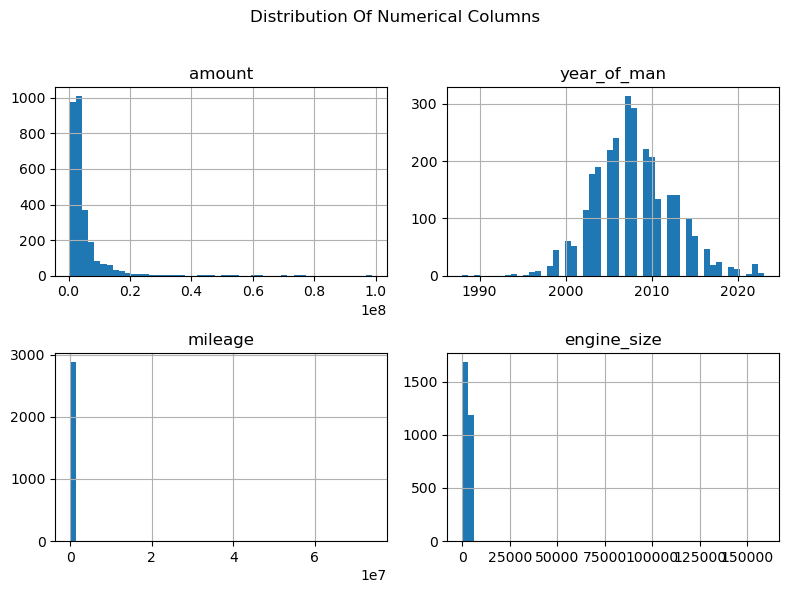

In [33]:
df.hist(bins=50, figsize=(8, 6))
plt.suptitle('Distribution Of Numerical Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Verifying The availability of outlyers

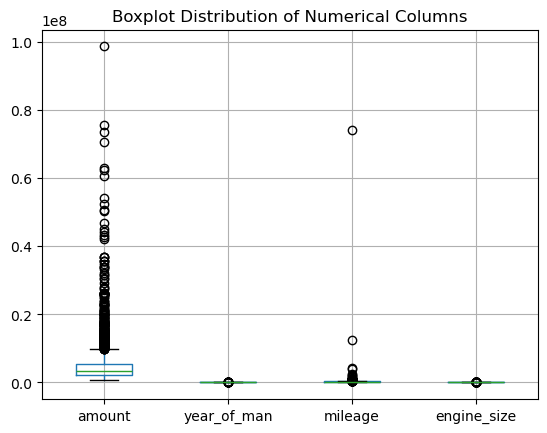

In [34]:
#A box plot is used here to check for outlyers
df.boxplot()
plt.title('Boxplot Distribution of Numerical Columns');

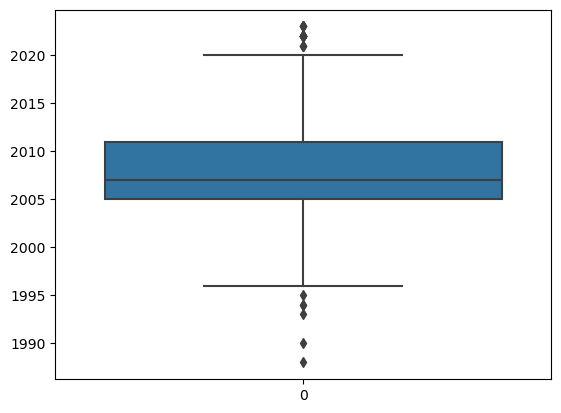

In [35]:
#Using a boxplot to check for outlyers in the year of man columns 
sns.boxplot(df['year_of_man']);

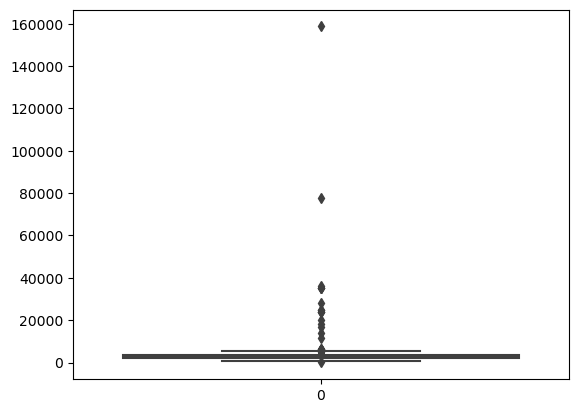

In [36]:
#Using a boxplot to check for outlyers on the engine size column
sns.boxplot(df['engine_size']);

In [37]:
#checking the range of numbers according to index on the mileage column 
df['mileage'].value_counts().sort_index()

mileage
0.0           16
1.0            4
194.0          1
199.0          1
948.0          1
              ..
2385539.0      1
4023356.0      1
4255811.0      1
12382065.0     1
74026754.0     1
Name: count, Length: 2768, dtype: int64

In [38]:
#Checking the range of numbers according to index on the year of man/mileage columns 
df.groupby('year_of_man')['mileage'].value_counts().sort_index()

year_of_man  mileage 
1988         186815.0    1
1990         356639.0    1
1993         252344.0    1
1994         290279.0    1
             396580.0    1
                        ..
2022         6410.0      1
             8557.0      1
             13164.0     1
             191398.0    2
2023         0.0         4
Name: count, Length: 2824, dtype: int64

In [39]:
#Checking the range of numbers according to index on the mileage/year_of_maan columns 
df.groupby('mileage')['year_of_man'].value_counts().sort_index()

mileage     year_of_man
0.0         2022           12
            2023            4
1.0         2001            1
            2005            2
            2010            1
                           ..
2385539.0   2008            1
4023356.0   2005            1
4255811.0   2001            1
12382065.0  2005            1
74026754.0  2009            1
Name: count, Length: 2824, dtype: int64

In [40]:
#getting rid of outlyers
df = df[df['mileage']<12382065.0]

In [41]:
#Ensuring outlyers are taken care of
df['mileage'].value_counts().sort_index()

mileage
0.0          16
1.0           4
194.0         1
199.0         1
948.0         1
             ..
1972121.0     1
2133299.0     1
2385539.0     1
4023356.0     1
4255811.0     1
Name: count, Length: 2766, dtype: int64

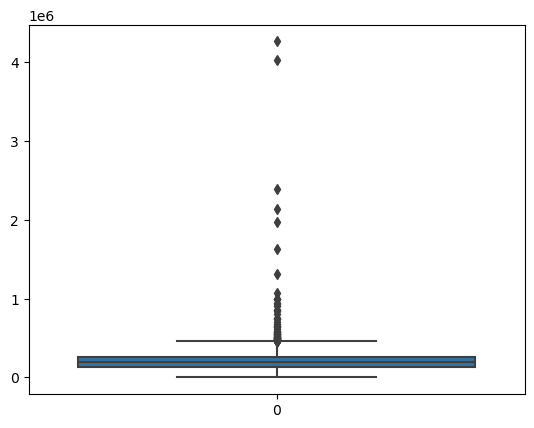

In [42]:
#Using a boxplot to make sure that outlyers are well taken care of 
sns.boxplot(df['mileage']);

In [43]:
#Cheking the range of numbers to know the outlyers on the engine_size column
df['engine_size'].value_counts().sort_index()

engine_size
25.0          1
659.0         1
1000.0        3
1100.0        1
1200.0        3
1300.0        7
1400.0       20
1500.0       21
1600.0       84
1700.0        6
1800.0      309
1900.0        3
2000.0      209
2100.0        1
2200.0       41
2300.0       17
2400.0      410
2500.0      198
2600.0       10
2700.0       47
2800.0       14
2900.0        4
3000.0      278
3200.0       28
3300.0      156
3400.0        8
3500.0      641
3600.0       15
3700.0       39
3800.0       33
3900.0        1
4000.0       68
4100.0        1
4200.0        3
4300.0        3
4400.0       16
4500.0        7
4600.0       29
4700.0       65
4800.0        4
4900.0        2
5000.0       23
5300.0        1
5400.0        9
5500.0        7
5600.0        9
5700.0       18
6200.0        2
11800.0       1
14000.0       1
17000.0       1
18000.0       1
20000.0       1
24000.0       3
25000.0       2
28000.0       1
35000.0       3
77830.0       1
158713.0      1
Name: count, dtype: int64

In [44]:
#Trimming the engine size columns to have the appropriate set of values 
lower_bound = df['engine_size'].quantile(0.01)
upper_bound = df['engine_size'].quantile(0.99)
df = df[(df['engine_size']>= lower_bound) & (df['engine_size'] <= upper_bound)]

In [45]:
#checking the value counts on the engine_size column
df['engine_size'].value_counts()

engine_size
3500.0    641
2400.0    410
1800.0    309
3000.0    278
2000.0    209
2500.0    198
3300.0    156
1600.0     84
4000.0     68
4700.0     65
2700.0     47
2200.0     41
3700.0     39
3800.0     33
4600.0     29
3200.0     28
5000.0     23
1500.0     21
1400.0     20
5700.0     18
2300.0     17
4400.0     16
3600.0     15
2800.0     14
2600.0     10
5600.0      9
5400.0      9
3400.0      8
4500.0      7
5500.0      7
1700.0      6
4800.0      4
2900.0      4
1900.0      3
4200.0      3
4300.0      3
4900.0      2
4100.0      1
5300.0      1
3900.0      1
2100.0      1
Name: count, dtype: int64

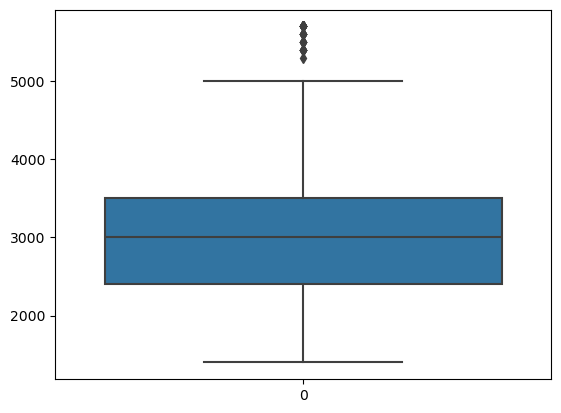

In [46]:
#Using a boxplot to check for outlyers on the engine size column
sns.boxplot(df['engine_size']);

In [47]:
#Checking the value_counts according to index on the amount column
df['amount'].value_counts().sort_index()

amount
577500      1
661500      1
682500      1
735000      5
766500      1
           ..
63000000    1
70720000    1
73500000    1
75600000    1
98700000    1
Name: count, Length: 724, dtype: int64

In [48]:
#using a boxplot to group the range of value into a quartile of 0.99 to 0.01 and disply a plot 
lower_bound = df['amount'].quantile(0.01)
upper_bound = df['amount'].quantile(0.99)
df = df[(df['amount']>= lower_bound) & (df['amount'] <= upper_bound)]

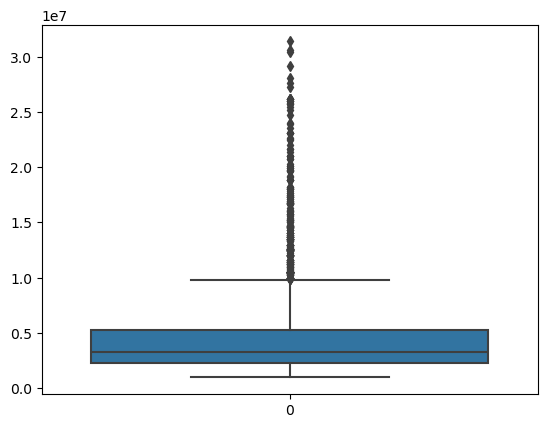

In [49]:
sns.boxplot(df['amount']);

In [50]:
#Checking the value counts in the region column. Note that the region column is a categorical column because it has sub categories 
df['region'].value_counts()

region
Oyo State, Ibadan                      261
Lagos State, Alimosho                  178
Lagos State, Lekki                     150
Lagos State, Ikeja                     145
Abuja (FCT), Garki 2                   135
Lagos State, Ojodu                     105
Lagos State, Ikorodu                   104
Abuja (FCT), Jabi                       98
Abuja (FCT), Wuse                       96
Rivers State, Port-Harcourt             83
Abuja (FCT), Kubwa                      79
Lagos State, Ajah                       77
Abuja (FCT), Mararaba                   76
Lagos State, Isolo                      70
Kwara State, Ilorin East                69
Lagos State, Ilupeju                    67
Lagos State, Yaba                       66
Abuja (FCT), Lugbe District             64
Lagos State, Ifako-Ijaiye               63
Lagos State, Amuwo-Odofin               61
Ogun State, Ado-Odo/Ota                 57
Kaduna State, Kaduna / Kaduna State     56
Abuja (FCT), Gwarinpa                   55
Edo 

In [51]:
#Spliting the region column into states and cities
df[['state', 'cities']] = df['region'].str.split(',', n=1, expand=True)
df['state'] = df['state'].str.strip()
df['cities'] = df['cities'].str.strip()

In [52]:
df.head()

,amount,region,year_of_man,mileage,engine_size,fuel_type,transmission,make,model,condition,state,cities
0,12937500,"Lagos State, Ikeja",2013,272474.0,3500.0,Petrol,Automatic,Lexus,ES,Foreign Used,Lagos State,Ikeja
1,6750000,"Abuja (FCT), Garki 2",2012,102281.0,5000.0,Petrol,Automatic,Land Rover,Range Rover,Nigerian Used,Abuja (FCT),Garki 2
3,3600000,"Abuja (FCT), Lugbe District",2007,139680.0,1800.0,Petrol,Automatic,Toyota,Corolla,Nigerian Used,Abuja (FCT),Lugbe District
4,3262500,"Lagos State, Isolo",2005,220615.0,3500.0,Petrol,Automatic,Mercedes-Benz,M Class,Nigerian Used,Lagos State,Isolo
5,4837500,"Abuja (FCT), Gwarinpa",2007,347614.0,3500.0,Petrol,Automatic,Lexus,ES,Nigerian Used,Abuja (FCT),Gwarinpa


In [53]:
#Checking the value counts of the cities sub-category
df['cities'].value_counts()

cities
Ibadan                   261
Alimosho                 178
Lekki                    150
Ikeja                    145
Garki 2                  135
Ojodu                    105
Ikorodu                  104
Jabi                      98
Wuse                      96
Port-Harcourt             83
Kubwa                     79
Ajah                      77
Mararaba                  76
Isolo                     70
Ilorin East               69
Ilupeju                   67
Yaba                      66
Lugbe District            64
Ifako-Ijaiye              63
Amuwo-Odofin              61
Ado-Odo/Ota               57
Kaduna / Kaduna State     56
Gwarinpa                  55
Benin City                53
Akure                     53
Uyo                       49
Magodo                    47
Ogba                      42
Katampe                   33
Surulere                  33
Victoria Island           32
Owerri                    30
Ikoyi                     30
Mushin                    29
Oshimil

In [54]:
#performing cleaning on the cities sub-category
df['cities'] = df['cities'].replace({'Kaduna / Kaduna State': 'Kaduna'})

In [55]:
#checking the value_counts of the cities sub-category of region 
df['cities'].value_counts()

cities
Ibadan             261
Alimosho           178
Lekki              150
Ikeja              145
Garki 2            135
Ojodu              105
Ikorodu            104
Jabi                98
Wuse                96
Port-Harcourt       83
Kubwa               79
Ajah                77
Mararaba            76
Isolo               70
Ilorin East         69
Ilupeju             67
Yaba                66
Lugbe District      64
Ifako-Ijaiye        63
Amuwo-Odofin        61
Ado-Odo/Ota         57
Kaduna              56
Gwarinpa            55
Benin City          53
Akure               53
Uyo                 49
Magodo              47
Ogba                42
Katampe             33
Surulere            33
Victoria Island     32
Owerri              30
Ikoyi               30
Mushin              29
Oshimili South      26
Kosofe              26
Onitsha             21
Ogudu               21
Ibeju               20
Apapa               20
Ikotun/Igando       19
Ipaja                1
Name: count, dtype: int64

In [56]:
#Checking the data information to ensure that all cleaning done thus far has been successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 0 to 2893
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amount        2800 non-null   int64  
 1   region        2800 non-null   object 
 2   year_of_man   2800 non-null   int64  
 3   mileage       2800 non-null   float64
 4   engine_size   2800 non-null   float64
 5   fuel_type     2800 non-null   object 
 6   transmission  2800 non-null   object 
 7   make          2800 non-null   object 
 8   model         2800 non-null   object 
 9   condition     2800 non-null   object 
 10  state         2800 non-null   object 
 11  cities        2800 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 348.9+ KB


# Analysis


## 1. Car Prices in Different Regions## 
Analyze how car prices differ across various regions in Nigeria. Determine whether certain regions have higher or lower car prices and explore potential reasons for these price differences.



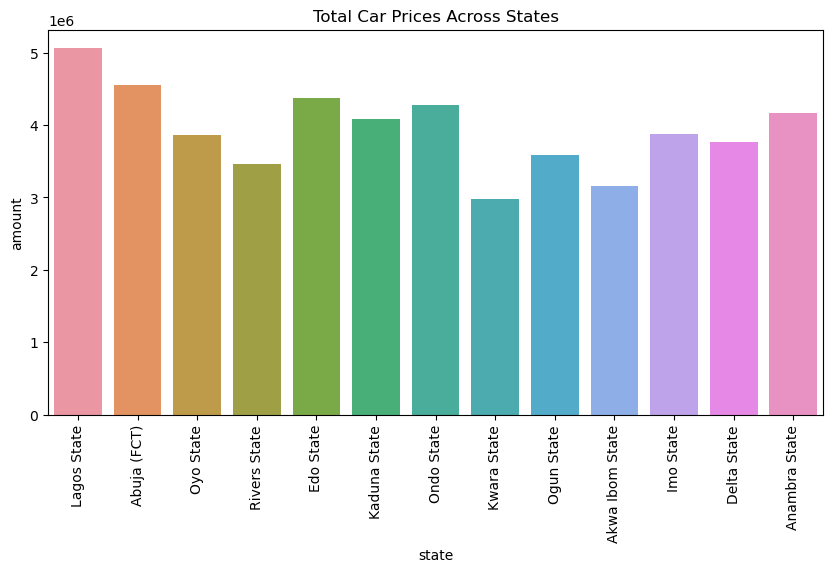

In [57]:
#Analysing how car prices differ across various regions in nigeria 
state_price = df.groupby('state')['amount'].sum().sort_values(ascending =False).index
plt.figure(figsize=(10, 5))
sns.barplot(x='state', y='amount', data =df, order=state_price, errorbar=None)
plt.title('Total Car Prices Across States')
plt.xticks(rotation=90); 

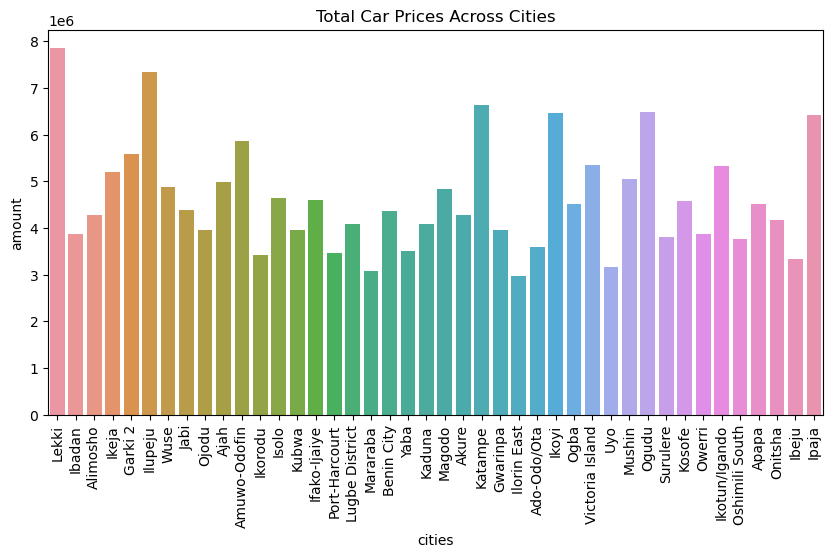

In [58]:
## Analysing the amount of car by city 
city_price = df.groupby('cities')['amount'].sum().sort_values(ascending =False).index
plt.figure(figsize=(10, 5))
sns.barplot(x='cities', y='amount', data =df, order=city_price, errorbar=None)
plt.title('Total Car Prices Across Cities')
plt.xticks(rotation=90);

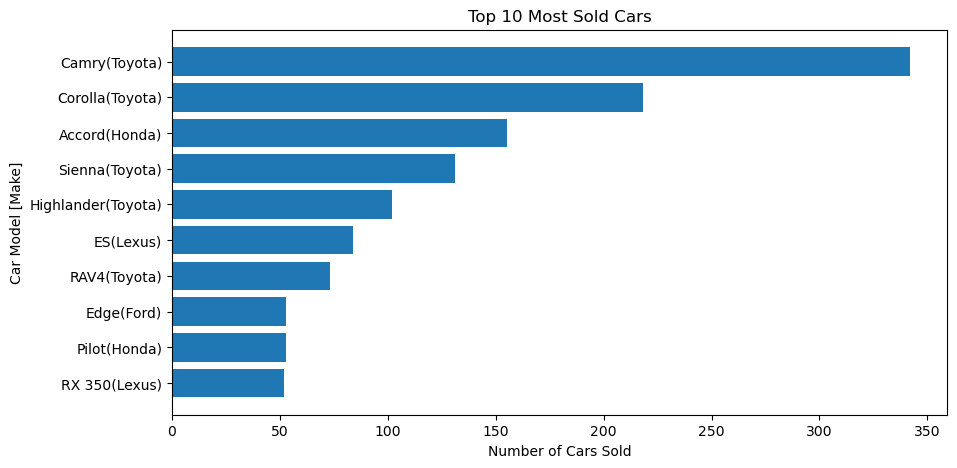

In [59]:
#investigating the 10 most sold cars 
most_sold_cars = df.groupby(['make','model']).size().reset_index(name='count').sort_values(by='count', ascending=False)
top_ten_cars = most_sold_cars.head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_ten_cars['model'] + '(' + top_ten_cars['make'] + ')', top_ten_cars['count'])
plt.title('Top 10 Most Sold Cars')
plt.xlabel('Number of Cars Sold') 
plt.ylabel('Car Model [Make]')
plt.gca().invert_yaxis()
plt.show()

#### Exploring The Potential Reasons For Car Price Differences in States and Cities

Using the following features below to investigate the factors that might influence car prices in different regions(states and cities)

- condition
- mileage
- make

In [60]:
#Checking how condition affects car price by region(states and city)
condition_price = df.groupby(['state', 'condition'])['amount'].sum().reset_index().sort_values(by='amount', ascending=False)
condition_price['amount']= condition_price['amount']/1_000
condition_price

,state,condition,amount
19,Lagos State,Nigerian Used,4465840.031
18,Lagos State,Foreign Used,2341809.496
2,Abuja (FCT),Nigerian Used,2308622.981
25,Oyo State,Nigerian Used,680156.975
1,Abuja (FCT),Foreign Used,563930.748
24,Oyo State,Foreign Used,328923.500
17,Lagos State,Brand New,311836.000
27,Rivers State,Nigerian Used,255931.850
16,Kwara State,Nigerian Used,152802.000
21,Ogun State,Nigerian Used,146413.123


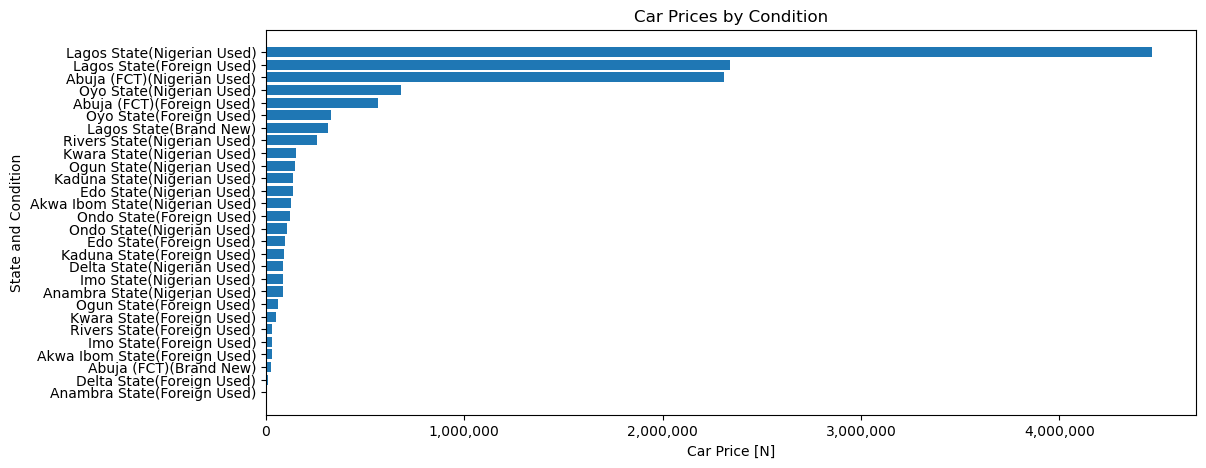

In [61]:
import matplotlib.ticker as mtick 
from matplotlib.ticker import ScalarFormatter


condition_price = df.groupby(['state', 'condition'])['amount'].sum().reset_index().sort_values(by='amount', ascending=False)
condition_price['amount']= condition_price['amount']/1_000

plt.figure(figsize= (12, 5))
plt.barh(condition_price['state'] + '(' + condition_price['condition'] + ')', condition_price['amount'])
plt.title('Car Prices by Condition')
plt.xlabel('Car Price [N]')
plt.ylabel('State and Condition')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().invert_yaxis()
plt.show()

In [62]:
df['mileage'].value_counts().sort_index()

mileage
0.0          15
1.0           4
948.0         1
1165.0        1
1409.0        1
             ..
1972121.0     1
2133299.0     1
2385539.0     1
4023356.0     1
4255811.0     1
Name: count, Length: 2680, dtype: int64

In [63]:
#Creating Mileage Categories by creating a total column 
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, df['mileage'].max()] 
labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-350k', '350-400k', '400-450k', '450-500k', '500k+']
df['categories-of-mileage']= pd.cut(df['mileage'], bins=bins, labels=labels)
mileage_price = df.groupby(['state', 'categories-of-mileage']).size().unstack()
mileage_price['Total']= mileage_price.sum(axis=1)
mileage_price = mileage_price.sort_values(by='Total', ascending=False)
mileage_price

C:\Users\user\AppData\Local\Temp\ipykernel_11156\121888887.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_price = df.groupby(['state', 'categories-of-mileage']).size().unstack()


categories-of-mileage,0-50k,50-100k,100-150k,150-200k,200-250k,250-300k,300-350k,350-400k,400-450k,450-500k,500k+,Total
state,,,,,,,,,,,,
Lagos State,45,127,274,317,231,175,93,55,26,25,23,1391
Abuja (FCT),16,61,131,139,120,76,50,19,8,4,12,636
Oyo State,2,34,55,63,42,28,15,11,5,4,2,261
Rivers State,1,12,23,23,13,7,3,0,0,0,1,83
Kwara State,1,1,12,14,9,7,10,7,3,2,3,69
Ogun State,1,2,4,7,16,7,10,7,1,2,0,57
Kaduna State,0,6,9,15,9,6,4,4,1,1,1,56
Edo State,3,6,12,8,6,10,3,1,4,0,0,53
Ondo State,0,1,2,16,5,10,9,6,1,2,1,53


In [64]:
#Dropping the extra total column used to categorise 
mileage_price = mileage_price.drop(columns='Total')
mileage_price

categories-of-mileage,0-50k,50-100k,100-150k,150-200k,200-250k,250-300k,300-350k,350-400k,400-450k,450-500k,500k+
state,,,,,,,,,,,
Lagos State,45,127,274,317,231,175,93,55,26,25,23
Abuja (FCT),16,61,131,139,120,76,50,19,8,4,12
Oyo State,2,34,55,63,42,28,15,11,5,4,2
Rivers State,1,12,23,23,13,7,3,0,0,0,1
Kwara State,1,1,12,14,9,7,10,7,3,2,3
Ogun State,1,2,4,7,16,7,10,7,1,2,0
Kaduna State,0,6,9,15,9,6,4,4,1,1,1
Edo State,3,6,12,8,6,10,3,1,4,0,0
Ondo State,0,1,2,16,5,10,9,6,1,2,1


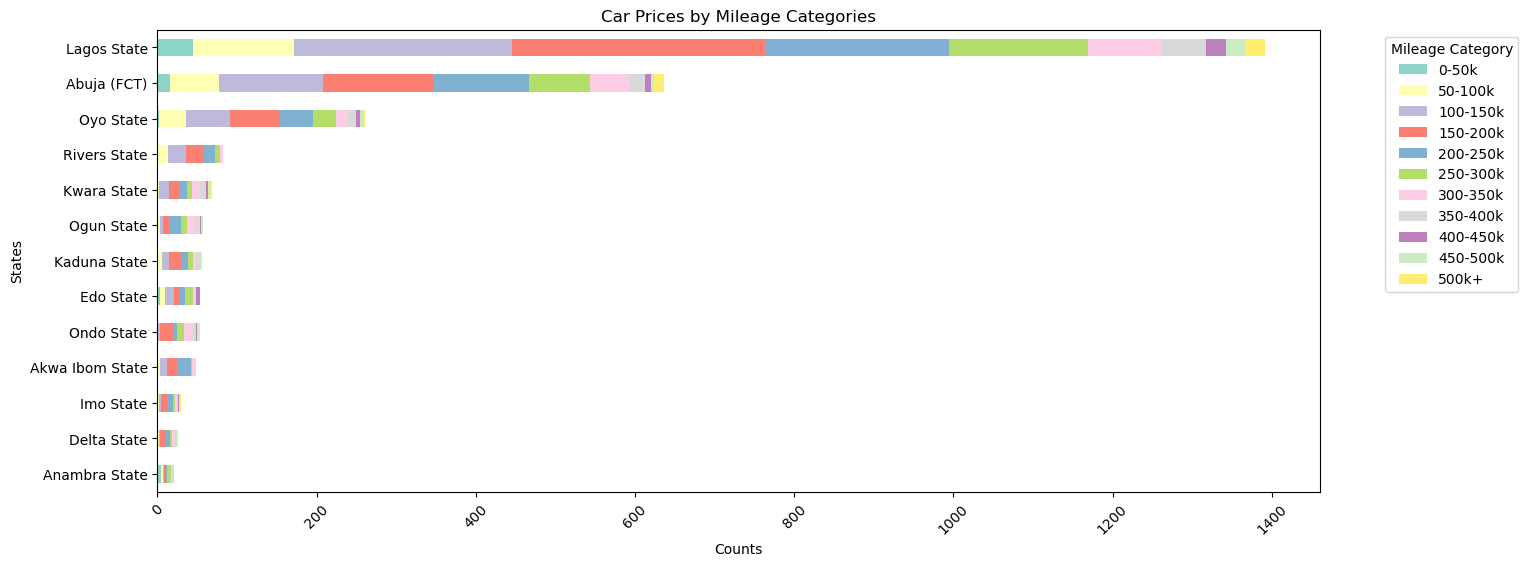

In [65]:
#adding a barh plot for proper analysis 
mileage_price.plot(kind='barh',  stacked=True, figsize=(15, 6), colormap='Set3' )
plt.title('Car Prices by Mileage Categories')
plt.xlabel('Counts')
plt.ylabel('States')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.legend(title='Mileage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11156\1159203587.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_price = df.groupby(['state', 'categories-of-mileage']).size().unstack()


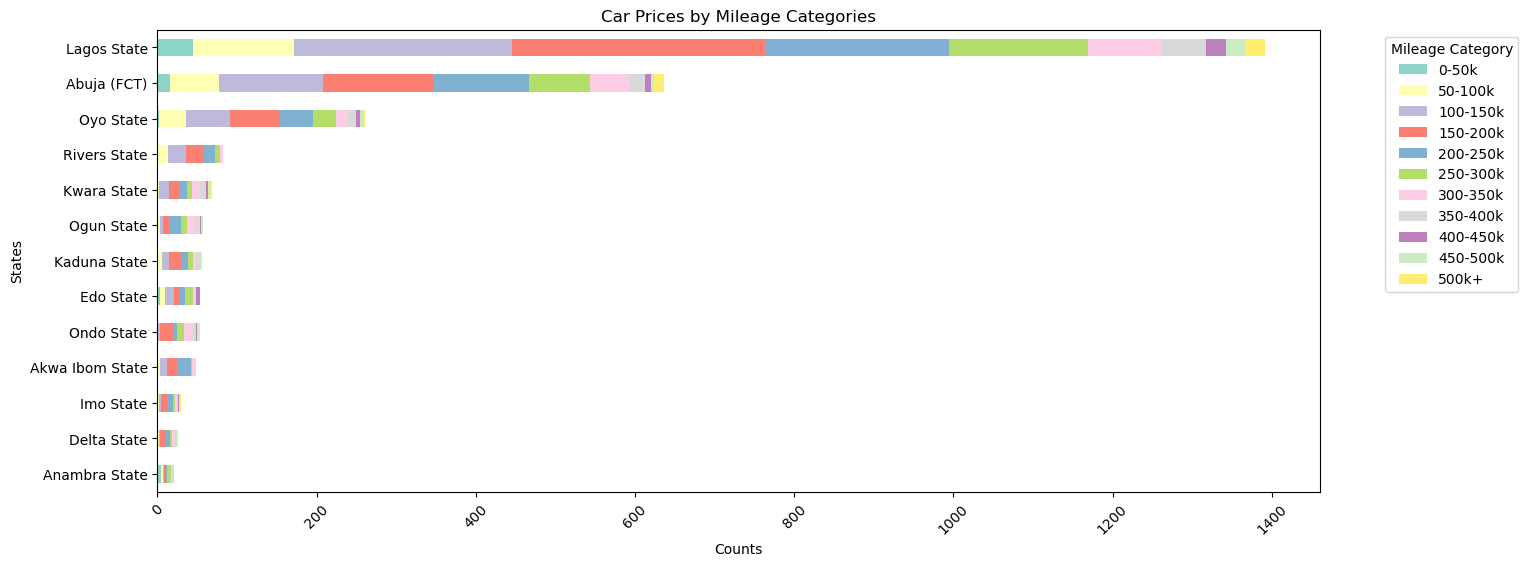

In [66]:
#Creating Mileage Categories
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, df['mileage'].max()] 
labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-350k', '350-400k', '400-450k', '450-500k', '500k+']
df['categories-of-mileage']= pd.cut(df['mileage'], bins=bins, labels=labels)
mileage_price = df.groupby(['state', 'categories-of-mileage']).size().unstack()
mileage_price['Total']= mileage_price.sum(axis=1)
mileage_price = mileage_price.sort_values(by='Total', ascending=False)
mileage_price = mileage_price.drop(columns='Total')
mileage_price.plot(kind='barh',  stacked=True, figsize=(15, 6), colormap='Set3' )
plt.title('Car Prices by Mileage Categories')
plt.xlabel('Counts')
plt.ylabel('States')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.legend(title='Mileage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

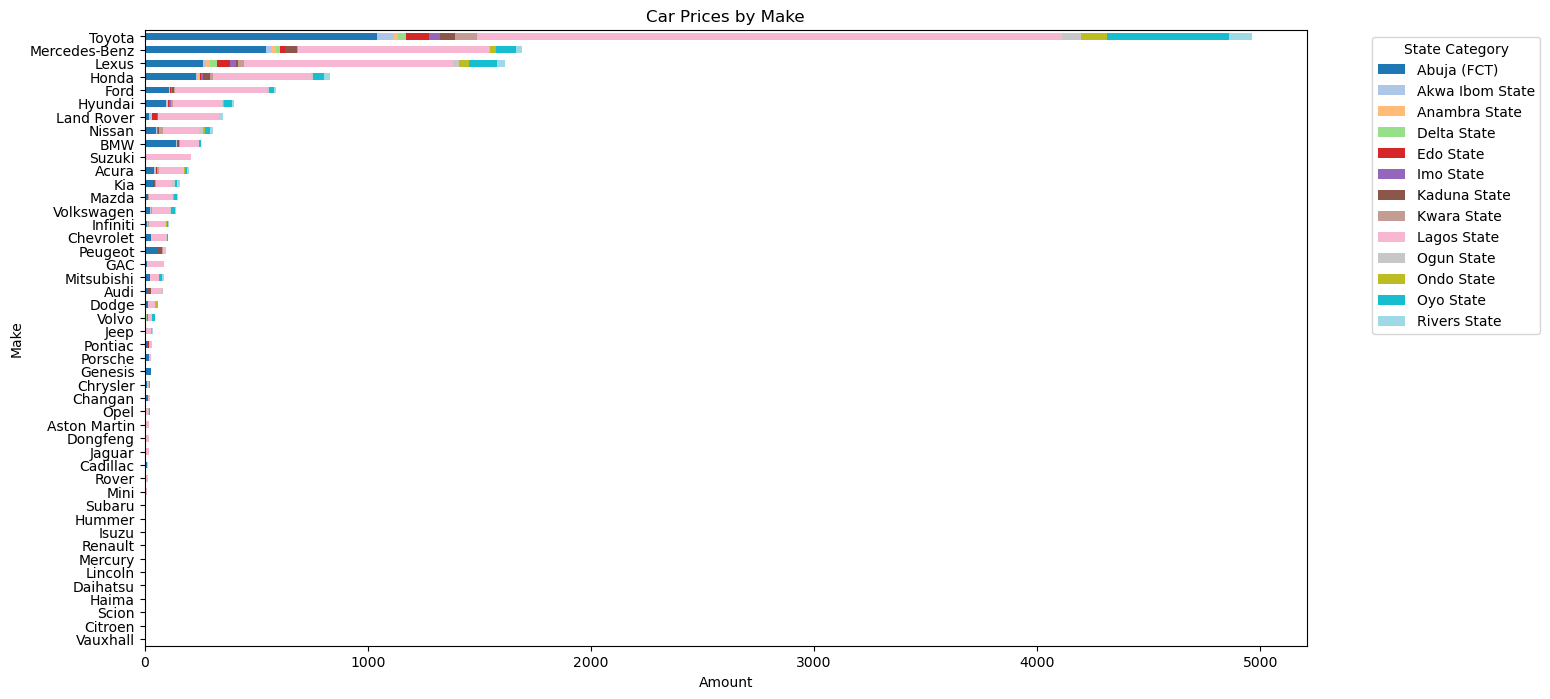

In [67]:
##Checking how condition affects car price by make 
make_price = df.groupby(['make', 'state'])['amount'].sum().unstack()/1e6
make_price = make_price.loc[make_price.sum(axis=1).sort_values(ascending=True).index]
make_price.plot(kind='barh', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('Car Prices by Make')
plt.xlabel('Amount')
plt.ylabel('Make')
plt.legend(title='State Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 2.	Car Age and Its Effect on Price
Investigate the relationship between the age of a car (based on its year of manufacture) and its price. Determine whether older cars are generally cheaper and if there are any car brands or models that hold their value better over time

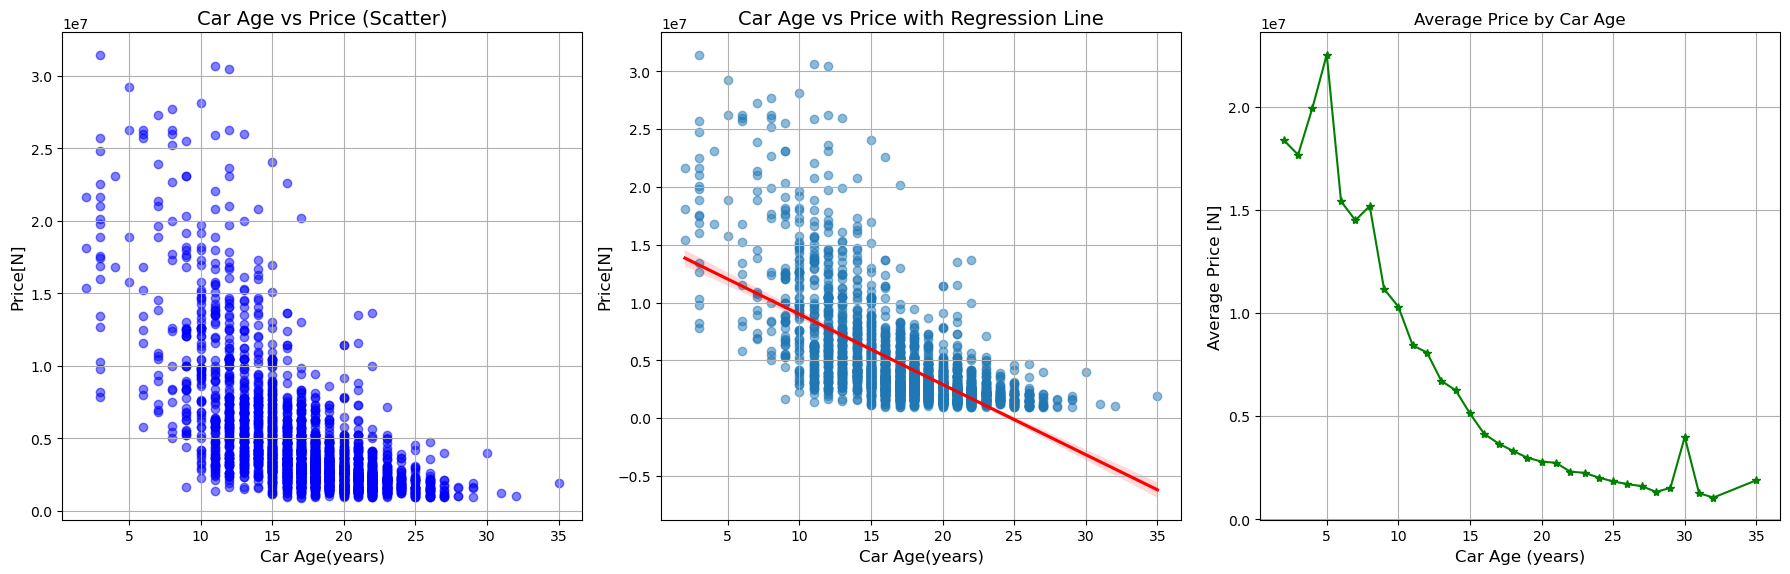

Pearson Correlation between car age and price: -0.65
This suggests that older cars are generally cheaper.

P-value: 0.0000
The Correlation is statistically significant.


In [68]:
from datetime import datetime
from scipy.stats import pearsonr

#Calculating Car Age Based on Current year
current_year = datetime.now().year
df['car_age'] = current_year - df['year_of_man']

#setting up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Scatter plot of car age vs price 
axes[0].scatter(df['car_age'], df['amount'], alpha = 0.5, color = 'blue')
axes[0].set_title('Car Age vs Price (Scatter)', fontsize=14)
axes[0].set_xlabel('Car Age(years)', fontsize=12)
axes[0].set_ylabel('Price[N]', fontsize=12)
axes[0].grid(True)

# 2. Scatter Plot with Regression Line (Car Age vs Price)
sns.regplot(x='car_age', y='amount', data=df, scatter_kws={'alpha':0.5},
            line_kws = {'color' : 'red'}, ax=axes[1])
axes[1].set_title('Car Age vs Price with Regression Line', fontsize=14)
axes[1].set_xlabel('Car Age(years)', fontsize =12)
axes[1].set_ylabel('Price[N]', fontsize=12)
axes[1].grid(True)

# 3. Line plot of Average Price per car age 
avg_price_per_age = df.groupby('car_age')['amount'].mean()
axes[2].plot(avg_price_per_age.index, avg_price_per_age.values, marker='*',color='green')
axes[2].set_title('Average Price by Car Age', fontsize=12)
axes[2].set_xlabel('Car Age (years)', fontsize=12)
axes[2].set_ylabel('Average Price [N]', fontsize=12)
axes[2].grid(True)

#Adjusting Layout 
plt.tight_layout()
plt.show()

#Pearson Correlation calculation and output
correlation, p_value = pearsonr(df['car_age'], df['amount'])
print(f"Pearson Correlation between car age and price: {correlation:.2f}")
if correlation < 0:
    print("This suggests that older cars are generally cheaper.")
else:
    print("This suggests that older cars man not be cheaper.")
print('')
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The Correlation is statistically significant.")
else:
    print("The Correlation is not statistically significant.")

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


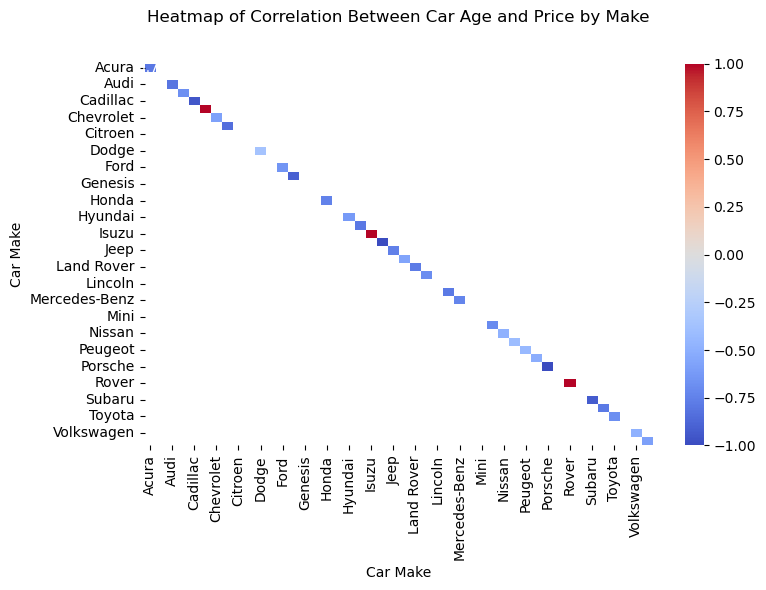

In [69]:
## Calculating The car age based on year
current_year = datetime.now().year
df['car_age'] = current_year - df['year_of_man']

#Function to calculate correlation between car age and car price for each make
def calc_correlation(group):
    if len(group) > 1:
        correlation, p_value = pearsonr(group['car_age'], group['amount'])
        return pd.Series({'correlation' : correlation})
    else: 
        return pd.Series({'correlation' : None})

# Calculating Correlation By Make
correlation_by_make = df.groupby('make').apply(calc_correlation).reset_index()

plt.figure(figsize=(8, 6))
heatmap_data = pd.DataFrame(index=correlation_by_make['make'],
                            columns=correlation_by_make['make'])
for i  in range(len(correlation_by_make)):
    heatmap_data.iloc[i, i] = correlation_by_make.iloc[i]['correlation']
    
sns.heatmap(heatmap_data.astype(float), annot=True, cmap='coolwarm', center=0)

plt.title('Heatmap of Correlation Between Car Age and Price by Make', pad=30)
plt.xlabel('Car Make')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

# 3.  Variation in Prices for the most Common Car Features


#### Identify the most common carr features in the dataset(e.g fuel type, transmission) and analyze how these feautures impact the price of cars. Explore weather the feautures vary across different regions or price ranges.

In [70]:
# most common fuel types and transmission types 
common_fuel_types = df['fuel_type'].value_counts().head(5)
common_transmissions = df['transmission'].value_counts().head(5)

print("Common Fuel Types:\n", common_fuel_types)
print("\nCommon Transmissions:\n", common_transmissions)

Common Fuel Types:
 fuel_type
Petrol      2773
Hybrid        16
Diesel        10
Electric       1
Name: count, dtype: int64

Common Transmissions:
 transmission
Automatic    2635
Manual        144
CVT            17
AMT             4
Name: count, dtype: int64


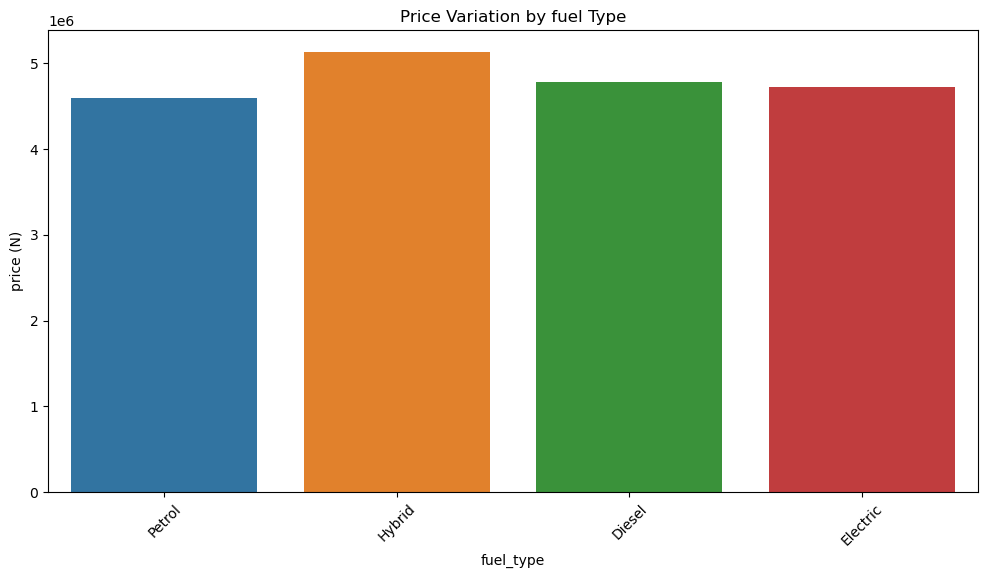

In [71]:
# Barplot for price variation by fuel type 
plt.figure(figsize=(12, 6))
sns.barplot(x='fuel_type', y='amount', data=df, errorbar=None)
plt.title('Price Variation by fuel Type')
plt.ylabel('price (N)')
plt.xticks(rotation=45)
plt.show()

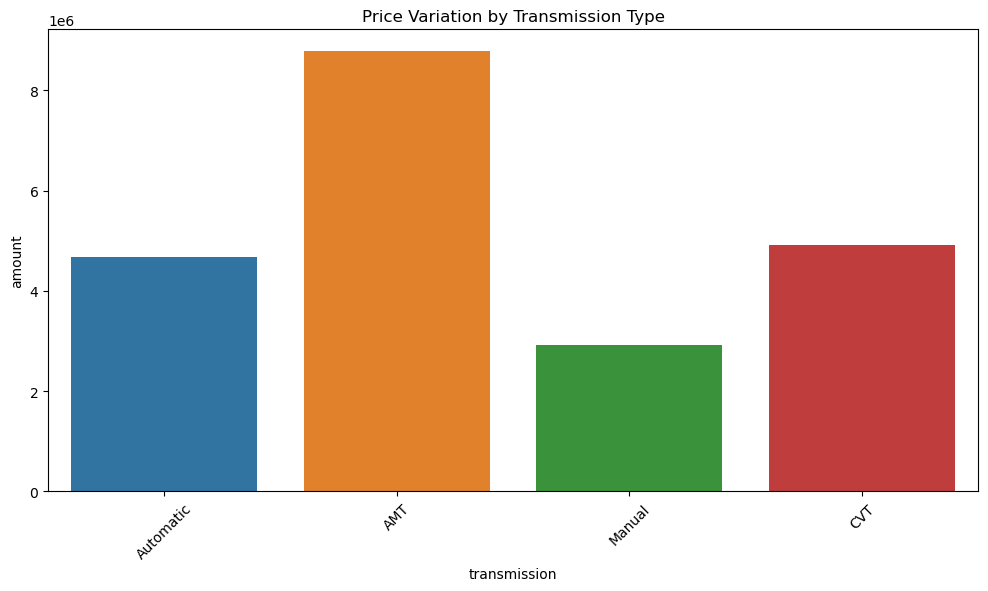

In [72]:
# Barplot for price variation by transmission type 
plt.figure(figsize=(12, 6))
sns.barplot(x='transmission', y='amount', data=df, errorbar=None)
plt.title('Price Variation by Transmission Type')
plt.xticks(rotation=45)
plt.show()

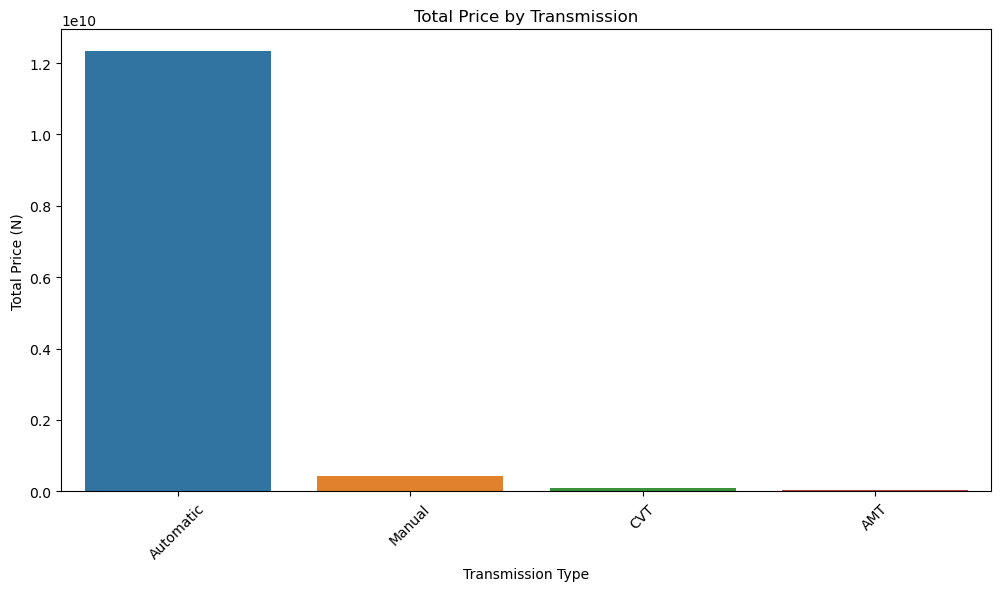

In [73]:
# Calculate Average Price by Transmission And region 
average_price_transmission = df.groupby('transmission')['amount'].sum().reset_index()
average_price_transmission.sort_values(by='amount', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_transmission, x='transmission', y='amount')
plt.title('Total Price by Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Total Price (N)')
plt.xticks(rotation=45)
plt.show()

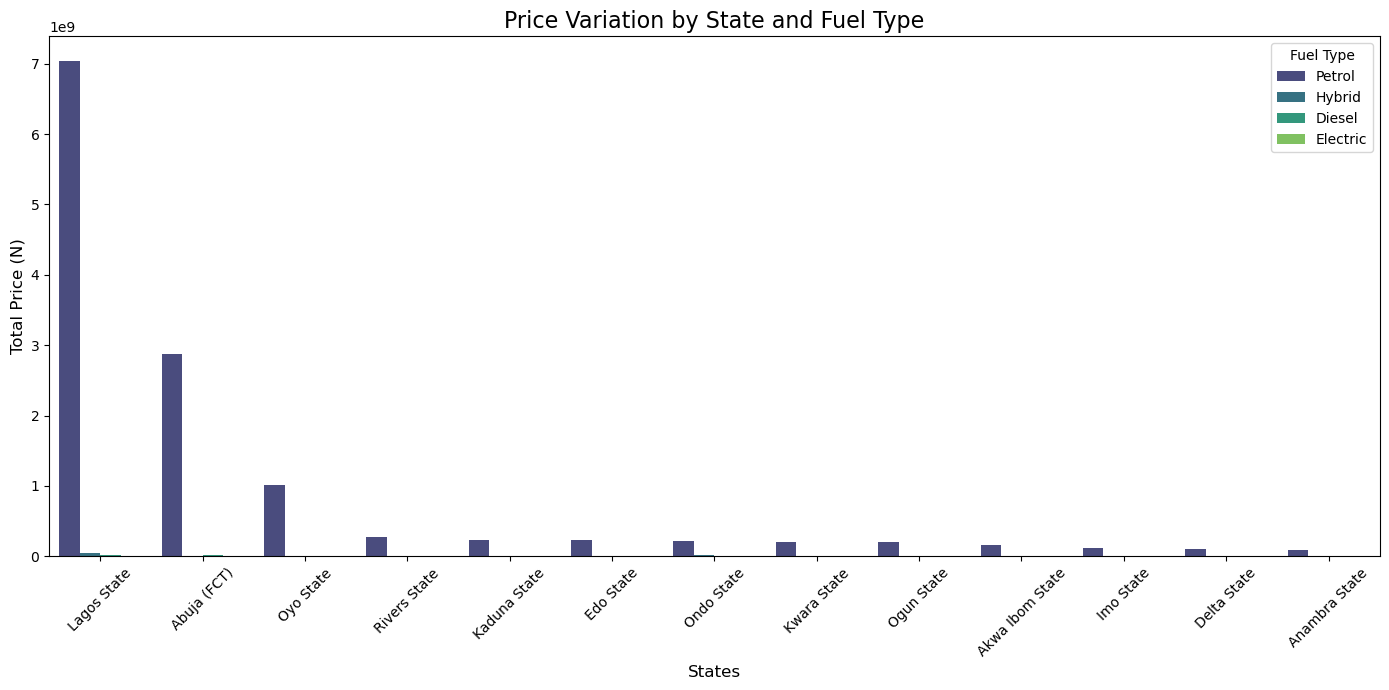

In [74]:
# Price Variation by State and Fuel type 
grouped_df = df.groupby(['state', 'fuel_type'], as_index=False)['amount'].sum()
sorted_grouped_df = grouped_df.sort_values(by='amount', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='state', y='amount', hue='fuel_type', data=sorted_grouped_df, palette='viridis')
plt.title('Price Variation by State and Fuel Type', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('States', fontsize=12)
plt.ylabel('Total Price (N)', fontsize=12)
plt.legend(title='Fuel Type', loc = 'upper right')
plt.tight_layout()
plt.show()

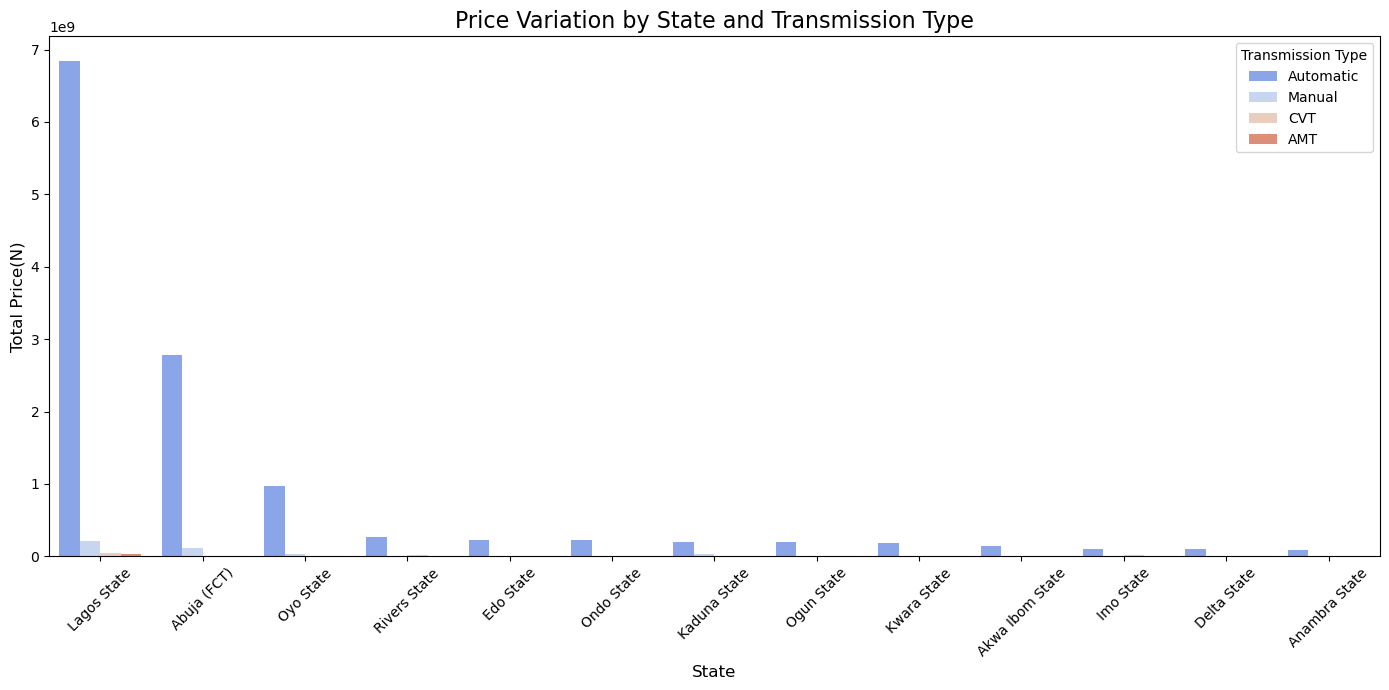

In [75]:
# Price variation by state and Transmission Type
grouped_df = df.groupby(['state', 'transmission'], as_index=False)['amount'].sum()
sorted_grouped_df = grouped_df.sort_values(by='amount', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x='state', y='amount', hue='transmission', data=sorted_grouped_df, palette='coolwarm')
plt.title('Price Variation by State and Transmission Type', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Price(N)', fontsize=12)
plt.legend(title='Transmission Type', loc='upper right')
plt.tight_layout()
plt.show()